# NLP Basic Assignment
## 과제 : spam.csv를 활용하여 유의미한 해석을 도출해주세요!

In [1]:
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다.
- 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다.

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [4]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Tokenizing


In [5]:
import nltk

In [6]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2']) # TreeBank

[nltk_data] Downloading package punkt to /Users/seolyumin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [7]:
from nltk.tokenize import wordpunct_tokenize

wordpunct_tokenize(spam.iloc[5]['v2'])

['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'",
 's',
 'been',
 '3',
 'week',
 "'",
 's',
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'",
 'd',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å',
 '£',
 '1',
 '.',
 '50',
 'to',
 'rcv']

의미 단위를 더 잘 반영하는 TreeBankTokenizer(`word_tokenize`)를 사용합니다.

In [8]:
from nltk.corpus import stopwords

nltk.download("stopwords")
stopword_list = set(stopwords.words("english"))

tokenized_sentences = [[token for token in word_tokenize(sentence.lower()) if token not in stopword_list] for sentence in spam["v2"]]
vocab = set()
for tokenized_sentence in tokenized_sentences:
    vocab.update(tokenized_sentence)
print(f"Vocab size: {len(vocab)}")
token_to_id = {token: id for id, token in enumerate(vocab)}
id_to_token = {value: key for key, value in token_to_id.items()}

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/seolyumin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocab size: 9349


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram 등이 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

### One-hot encoding

In [9]:
import numpy as np

embeddings = []
for tokenized_sentence in tokenized_sentences:
    embedding = [0] * len(vocab)
    for token in tokenized_sentence:
        embedding[token_to_id[token]] = 1
    embeddings.append(embedding)
embeddings = np.array(embeddings)

### Word2Vec

In [10]:
from gensim.models import Word2Vec

word2vec = Word2Vec(tokenized_sentences, min_count=3, seed=42)

In [11]:
word2vec.wv.vectors.shape

(2828, 100)

In [12]:
word2vec.wv.most_similar("fantasy")

[('pounds', 0.99318927526474),
 ('top', 0.9931435585021973),
 ('8007', 0.9931144714355469),
 ('smile', 0.9931101202964783),
 ('lol', 0.9929789304733276),
 ('better', 0.9929739236831665),
 ('thought', 0.992963433265686),
 ('everything', 0.9929600954055786),
 ('cheap', 0.9929515719413757),
 ('auction', 0.9929400682449341)]

In [19]:
word2vec.wv.most_similar("fantasie")

KeyError: "Key 'fantasie' not present in vocabulary"

### FastText

In [13]:
from gensim.models import FastText

fasttext = FastText(tokenized_sentences, min_count=3, seed=42)

In [14]:
fasttext.wv.vectors.shape

(2828, 100)

In [15]:
fasttext.wv.most_similar("fantasy")

[('competition', 0.9999724626541138),
 ('wer', 0.9999703168869019),
 ('silent', 0.9999701380729675),
 ('dates', 0.9999697208404541),
 ('station', 0.9999693632125854),
 ('talent', 0.9999688267707825),
 ('announcement', 0.9999681711196899),
 ('management', 0.9999670386314392),
 ('center', 0.9999668598175049),
 ('sed', 0.9999668002128601)]

In [16]:
fasttext.wv.most_similar("fantasie")

[('fantasy', 0.9999846816062927),
 ('wer', 0.9999697804450989),
 ('competition', 0.9999656677246094),
 ('available', 0.9999651312828064),
 ('stranger', 0.9999629259109497),
 ('invnted', 0.9999626874923706),
 ('tried', 0.9999626278877258),
 ('wed', 0.9999619722366333),
 ('center', 0.9999618530273438),
 ('sed', 0.9999618530273438)]

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

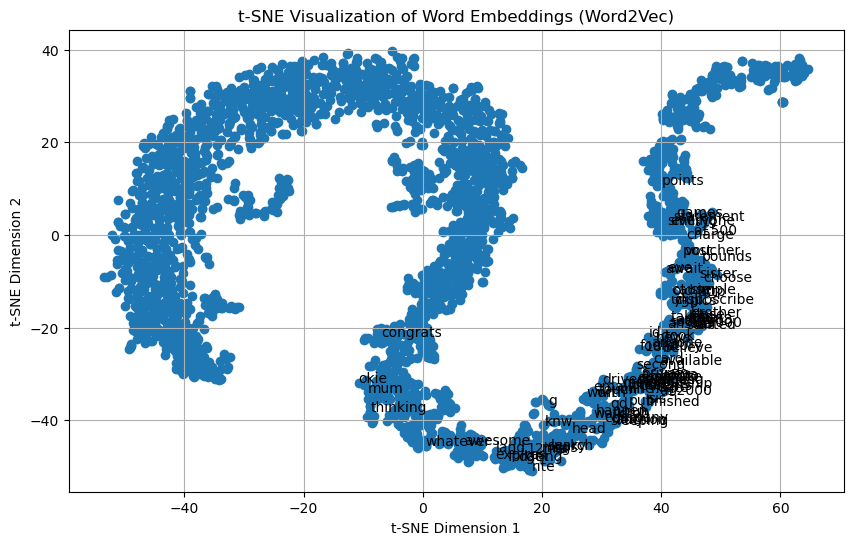

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(word2vec.wv.vectors)

plt.figure(figsize=(10, 6))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])

for i, word in enumerate(word2vec.wv.index_to_key[500:600]):
    plt.annotate(word, (vectors_tsne[i + 500, 0], vectors_tsne[i + 500, 1]))

plt.title("t-SNE Visualization of Word Embeddings (Word2Vec)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

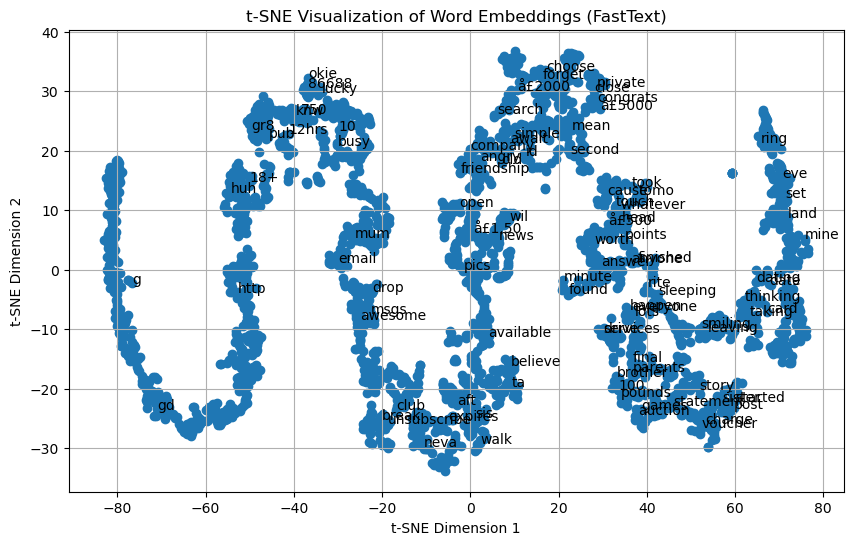

In [18]:
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(fasttext.wv.vectors)

plt.figure(figsize=(10, 6))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])

for i, word in enumerate(fasttext.wv.index_to_key[500:600]):
    plt.annotate(word, (vectors_tsne[i + 500, 0], vectors_tsne[i + 500, 1]))

plt.title("t-SNE Visualization of Word Embeddings (FastText)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()